<a href="https://colab.research.google.com/github/OmarSanvicente/OmarSanvicente/blob/main/Cambio_de_Celsius_a_Fahrenheit_con_una_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Vamos a entrenar a una red neuronal con datos de entrada y salida para 
calcular el cambio de grados Celsius a grados Fahrenheit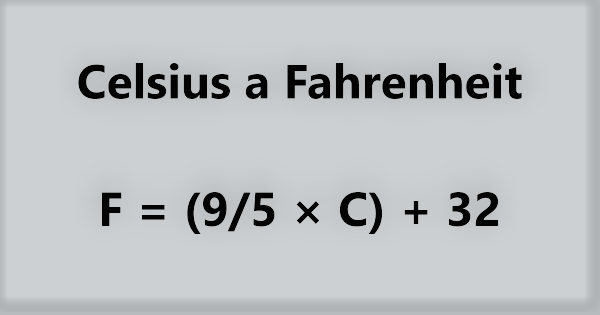



In [8]:
#importamos tensorflow para manejar tensores y numpy para manejar arreglos de modo mas simple
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Estos son nuesetros valores de entrada y salida (esperados), tambien llamados vectores
#np es por que estamos usando la libreria numpy np.array es un arreglo manejado mediante numpy
#dtype es el tipo de dato que es cada entrada de los vectores
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float)
farenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [3]:
#Aqui la capa que usaremos va a ser una capa densa la cuál conecta la neurona de entrada con todas las neuronas de salida, en unidades es 1 neurona y de entrada una neurona tambien
#El modelo que usaremos es un modelo secuencial de keras, al igual que la capa

capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])


In [4]:
#Definimos el modelo que va a compilar con un optimizador, en este caso es Adam, con una perdida cuadrada promedio, tipicamente usada en estadistica
#el valor que le damos a Adam es basicamente el paso que debera seguir, para llegar al error cuadratico medio.

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [5]:
#definimos al historial para ver la evolución del ajuste entre celsius y farenheit 
#epochs es el numero de vueltas que le va a dar al modelo
#Verbose = False es que no nos muestre el resultado de cada una de las vueltas
print("Comenzando entrenamiento")
historial = modelo.fit(celsius, farenheit, epochs=1000, verbose= False)
print("El modelo se ha entrenado!")

Comenzando entrenamiento
El modelo se ha entrenado!


Podemos ver a partir de que número de iteración es que el modelo ha dejado de optimizar


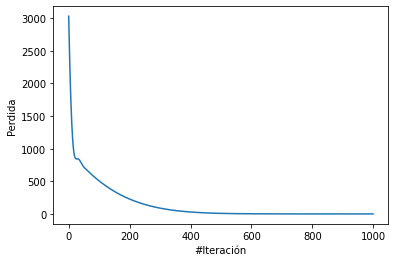

In [12]:
plt.xlabel("#Iteración")
plt.ylabel("Perdida")
plt.plot(historial.history["loss"])
print("Podemos ver a partir de que número de iteración es que el modelo ha dejado de optimizar")

In [6]:
#Hagamos una prueba con nuestra predicción
print("Hagamos una predicción:")
prueba = float(input("Ingrese la temperatura en grados Celsius: "))
resultado = modelo.predict([prueba])
print("El resultado es: " +str(resultado)+ "Fahrenheit")

farenh= prueba*1.8+32
err= resultado/farenh
print("El resultado bajo la formula '°Fahrenheit = 1.8*(°Celsius)+ 32 es: ", farenh, "Fahrenheit")
print("Con lo que vemos el resultado tiene un margen de error pequeño de:", err,"%")

Hagamos una predicción:
Ingrese la temperatura en grados Celsius: 50
1/1 [==============================] - 0s 69ms/step
El resultado es: [[121.833275]]Fahrenheit
El resultado bajo la formula '°Fahrenheit = 1.8*(°Celsius)+ 32 es:  122.0 Fahrenheit
Con lo que vemos el resultado tiene un margen de error pequeño de: [[0.9986334]] %


In [13]:
print("Veamos que variables internas produce el modelo")
print(capa.get_weights())
#Podemos ver que los pesos son: 1.7981979 y 31.923376
#Que son muy cercanos a la formulación "°Fahrenheit = 1.8*(°Celsius)+ 32"
#Así podemos decir que nuestro programa ha sido un exito!

Veamos que variables internas produce el modelo
[array([[1.7981979]], dtype=float32), array([31.923376], dtype=float32)]
